# Explorativní analýza
*Proveďte explorativní analýzu zvolené datové sady.*

In [93]:
# potřebné moduly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pandas.api.types import is_numeric_dtype

# načtení dat a uložení do dataframu
csv_file="datasets/dataset-penguins/penguins_lter.csv"
df = pd.read_csv(csv_file)

## Průzkum základních vlastností atributů
*Prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)*

Datová sada obsahuje celkově 344 záznamů a 17 atributů.

Popis atributů dostupný na [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html).

Seznam atributů, počet neprázdných hodnot a jejich datový typ.
Pozn. datový typ object může být string, datum apod. Automatické odvození pomocí pandas nemusí být vždy zcela přesné, proto je potřeba každý atribut ručně zkontrolovat.

Následující kousek kódu vypisuje základní informace pro každý atribut obsažený v datové sadě.

In [94]:
for col_name in df.columns:
    s = df[col_name]

    print(f"----------{col_name}----------")
    print(f"Datový typ: {s.dtype}")
    print(f"Počet unikátních hodnot: {len(s.unique())}")
    print(f"Počet prázdných hodnot: {s.isna().sum()}")
    print(f"5 nejčastějších hodnot:")
    for index, value in s.value_counts(normalize=True).iloc[:5].items():
        print(f"{value:.2%}: {index}")

    if is_numeric_dtype(s):
        print(f"Minimální hodnota: {s.min()}")
        print(f"Maximální hodnota: {s.max()}")
        print(f"Průměrná hodnota: {s.mean():.3f}")
        print(f"Medián: {s.median():.3f}")
    
    print()

----------studyName----------
Datový typ: object
Počet unikátních hodnot: 3
Počet prázdných hodnot: 0
5 nejčastějších hodnot:
34.88%: PAL0910
33.14%: PAL0809
31.98%: PAL0708

----------Sample Number----------
Datový typ: int64
Počet unikátních hodnot: 152
Počet prázdných hodnot: 0
5 nejčastějších hodnot:
0.87%: 1
0.87%: 45
0.87%: 52
0.87%: 51
0.87%: 50
Minimální hodnota: 1
Maximální hodnota: 152
Průměrná hodnota: 63.151
Medián: 58.000

----------Species----------
Datový typ: object
Počet unikátních hodnot: 3
Počet prázdných hodnot: 0
5 nejčastějších hodnot:
44.19%: Adelie Penguin (Pygoscelis adeliae)
36.05%: Gentoo penguin (Pygoscelis papua)
19.77%: Chinstrap penguin (Pygoscelis antarctica)

----------Region----------
Datový typ: object
Počet unikátních hodnot: 1
Počet prázdných hodnot: 0
5 nejčastějších hodnot:
100.00%: Anvers

----------Island----------
Datový typ: object
Počet unikátních hodnot: 3
Počet prázdných hodnot: 0
5 nejčastějších hodnot:
48.84%: Biscoe
36.05%: Dream
15.12%:

## Průzkum rozložení atributů

*Prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).*

### Porovnání rozložení hodnot tělesných vlastností tučňáků podle druhu

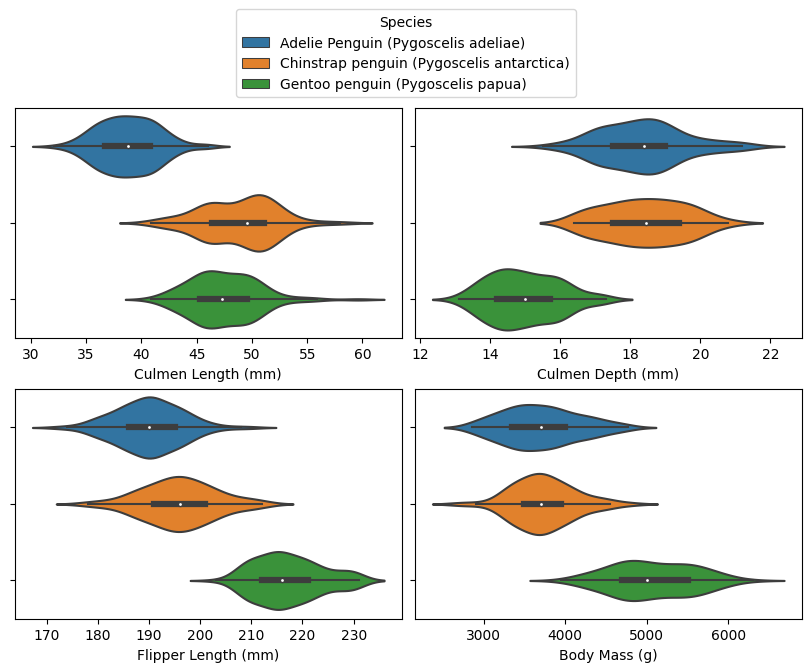

In [95]:
fig, ax = plt.subplots(3,2,figsize=(8, 8),constrained_layout = True)

# nehezky trik aby legenda mohla vypadat tak jak vypada
g_legend = sns.violinplot(data=df, x='Culmen Length (mm)', y='Species', hue='Species', ax=ax[2,0])
ax[2,0].set_visible(False)
ax[2,1].set_visible(False)

g1 = sns.violinplot(data=df, x='Culmen Length (mm)', y='Species',  ax=ax[0,0])
g1.set(yticklabels=[], ylabel=None)
g2 = sns.violinplot(data=df, x='Culmen Depth (mm)', y='Species', ax=ax[0,1])
g2.set(yticklabels=[], ylabel=None)
g3 = sns.violinplot(data=df, x='Flipper Length (mm)', y='Species', ax=ax[1,0])
g3.set(yticklabels=[], ylabel=None)
g4 = sns.violinplot(data=df, x='Body Mass (g)', y='Species', ax=ax[1,1])
g4.set(yticklabels=[], ylabel=None)

fig.legend()
sns.move_legend(
    fig, "lower center",
    bbox_to_anchor=(.5, 1), title="Species"
)
plt.show()

### Zastoupení jednotlivých druhů tučňáků na různých ostrovech

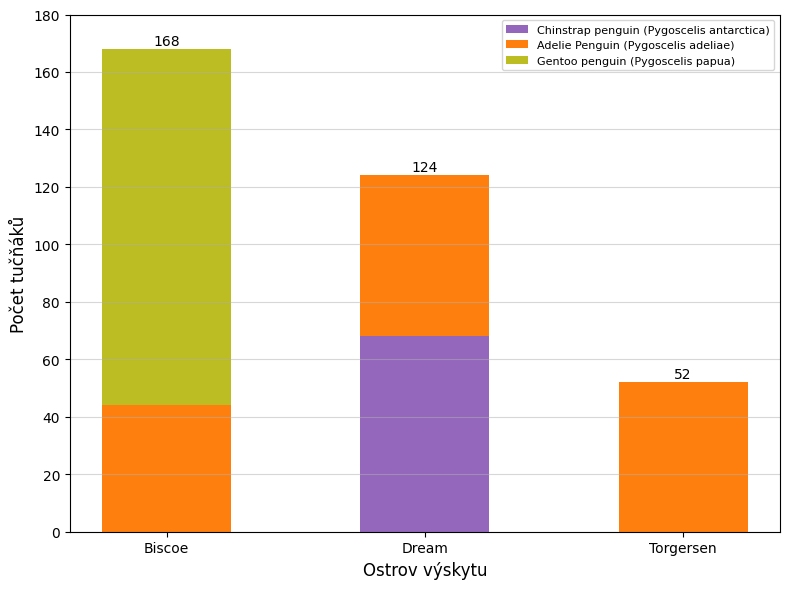

In [96]:
# Seskupení podle ostrova, druhu a následně spočtení četnosti zastoupení skupin
plot1_df = df[["Island","Species"]].copy()
species = df["Species"].unique()

for s in species:
    plot1_df[s] = plot1_df.loc[:, "Species"]

plot1_df = plot1_df.groupby(['Island'])[species].apply(lambda x: (x==species).sum()).reset_index()


# Graf
plt.figure(figsize=(8, 6))
peng1_bars = plt.bar(x=plot1_df['Island'], height=plot1_df[species[1]], width=0.5, color="C4", label=species[1])
peng2_bars = plt.bar(x=plot1_df['Island'], height=plot1_df[species[0]], bottom=plot1_df[species[1]], width=0.5, color="C1", label=species[0])
peng3_bars = plt.bar(x=plot1_df['Island'], height=plot1_df[species[2]], bottom=plot1_df[species[0]], width=0.5, color="C8", label=species[2])
all_barplots = [peng1_bars, peng2_bars, peng3_bars]

plt.xlabel("Ostrov výskytu", fontsize=12)
plt.ylabel("Počet tučňáků", fontsize=12)
plt.legend(fontsize=8)

plt.grid(axis='y', alpha=0.5)
y_ticks = np.arange(0, 200, 20)
plt.yticks(y_ticks)
plt.tight_layout()

total_heights = [0, 0, 0]
for bars in all_barplots:
    for i, p in enumerate(bars):
        h = p.get_height()
        total_heights[i] += h
        if bars == all_barplots[-1]:
            x = p.get_x()+p.get_width()/2.
            plt.annotate(f'{total_heights[i]}', xy=(x, total_heights[i]), xytext=(0,1), fontsize=10, textcoords="offset points", ha="center", va="bottom")

plt.show()


### Hodnoty Delta15N a Delta13C v závislosti na ostrově a druhu

Z grafů můžeme vypozorovat, že významnější clustery tvoří pouze určení podle druhu. Konkrétně druhy Chinstrap a Gentoo.
Ostrov života se nezdá mít příliš velký vliv na poměr rozložení izotopů a to ani dusíku ani uhlíku.

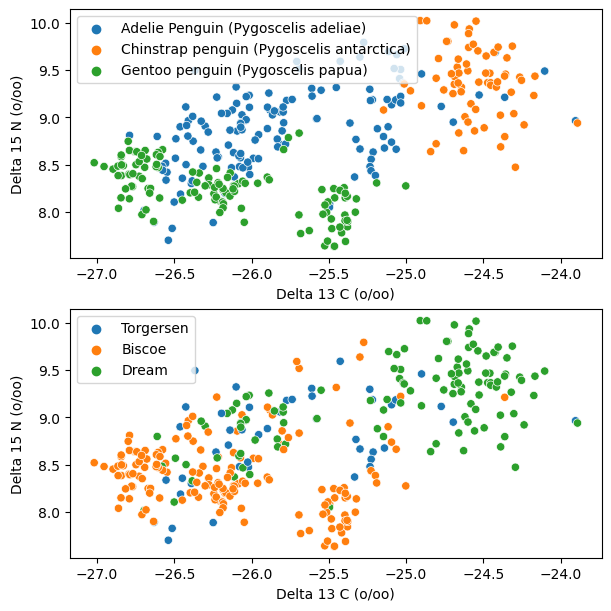

In [97]:
fig, ax = plt.subplots(2,1,figsize=(6, 6),constrained_layout = True)

g1 = sns.scatterplot(data=df, x="Delta 13 C (o/oo)", y="Delta 15 N (o/oo)", hue="Species", ax=ax[0])
g1.legend(loc="upper left")
g2 = sns.scatterplot(data=df, x="Delta 13 C (o/oo)", y="Delta 15 N (o/oo)", hue="Island", ax=ax[1])
g2.legend(loc="upper left")
plt.show()

### Počet tučňáků dle pohlaví v závislosti na jejich hmotnosti

Z grafu níže je viditelné, že největší počet tučňáků se koncentruje u dvou hmotnostních bodů.

Nejvíce samic má váhu okolo 3500 g a samců okolo 4000 g. Druhá nejčastější váha samic je 4700 g a samců 5500 g.

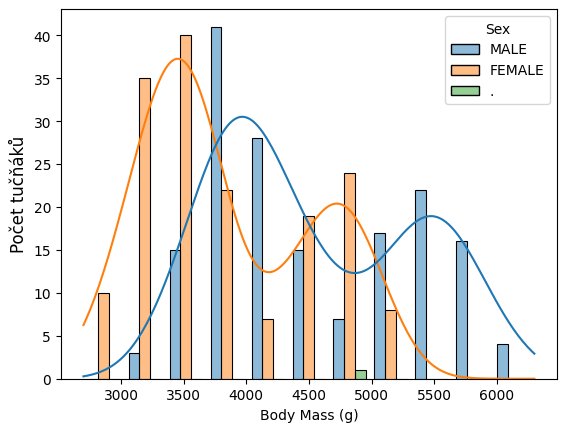

In [98]:

df_dropna = df.loc[:,['Sex', 'Body Mass (g)']].dropna()
plt.ylabel("Počet tučňáků", fontsize=12)

sns.histplot(data=df_dropna, hue="Sex", x="Body Mass (g)",multiple="dodge", shrink=.8, kde=True)
plt.show()

Zdá se že váha nezávisí pouze na pohlaví, proto je potřeba se podívat na grafy rozdělené podle druhu.

Z grafů, které odhadují pravděpodobnostní rozdělení váhy podle pohlaví je patrné, že když se váha uvažuje pouze v rámci druhu, existuje vždy významný rozdíl mezi samci a samicemi. Toto zjištění můžeme použít jako apriori hodnotu pro Bayesovskou klasifikaci Maximum likelihood.

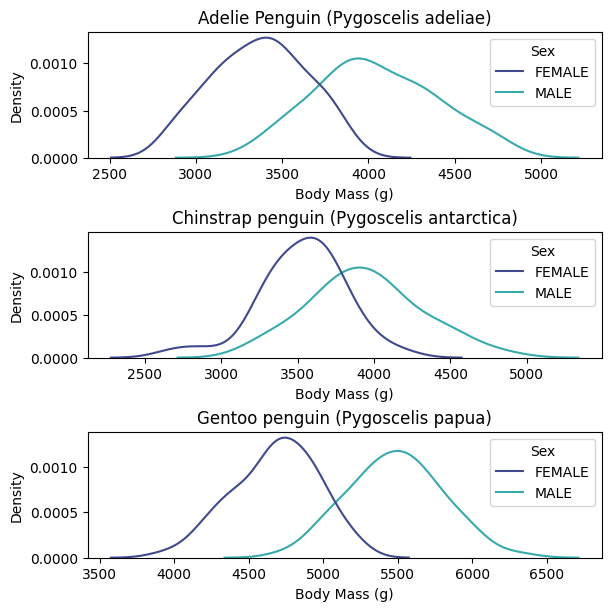

In [99]:
df_all_species = df.loc[:,['Species', 'Sex', 'Body Mass (g)']].dropna()
df_all_species = df_all_species[df_all_species["Sex"] != "."]

species = df_all_species['Species'].unique()


fig, ax = plt.subplots(3,1,figsize=(6, 6),constrained_layout = True)


for i, species in enumerate(species):
    df_tmp = df_all_species[df_all_species["Species"] == species].sort_values(by="Sex")

    sns.kdeplot(data=df_tmp, x='Body Mass (g)', hue='Sex', common_norm=False, ax=ax[i], palette="mako");
    ax[i].set_title(species)
    

plt.show()

### Počty dochovaných snůšek podle pohlaví

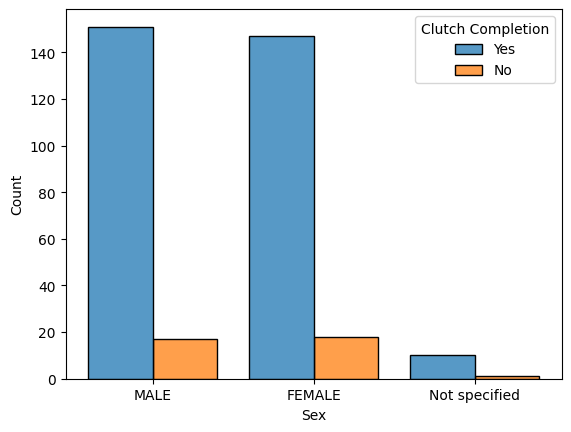

In [100]:
columns = ['Species', 'Region', 'Sex', 'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
df_plots3 = df[columns].copy()
df_plots3.loc[(df_plots3['Sex'] != "MALE") & (df_plots3['Sex'] != "FEMALE"), 'Sex'] = ""
df_plots3.loc[df_plots3['Sex'] == "", 'Sex'] = 'Not specified'

df_plots3 = df_plots3[df_plots3['Sex'].notna()]

sns.histplot(data=df_plots3, x="Sex", hue="Clutch Completion", multiple="dodge", shrink=.8)

plt.show()

### Vztah dvojic tělesných atributů na základě druhu tučňáka

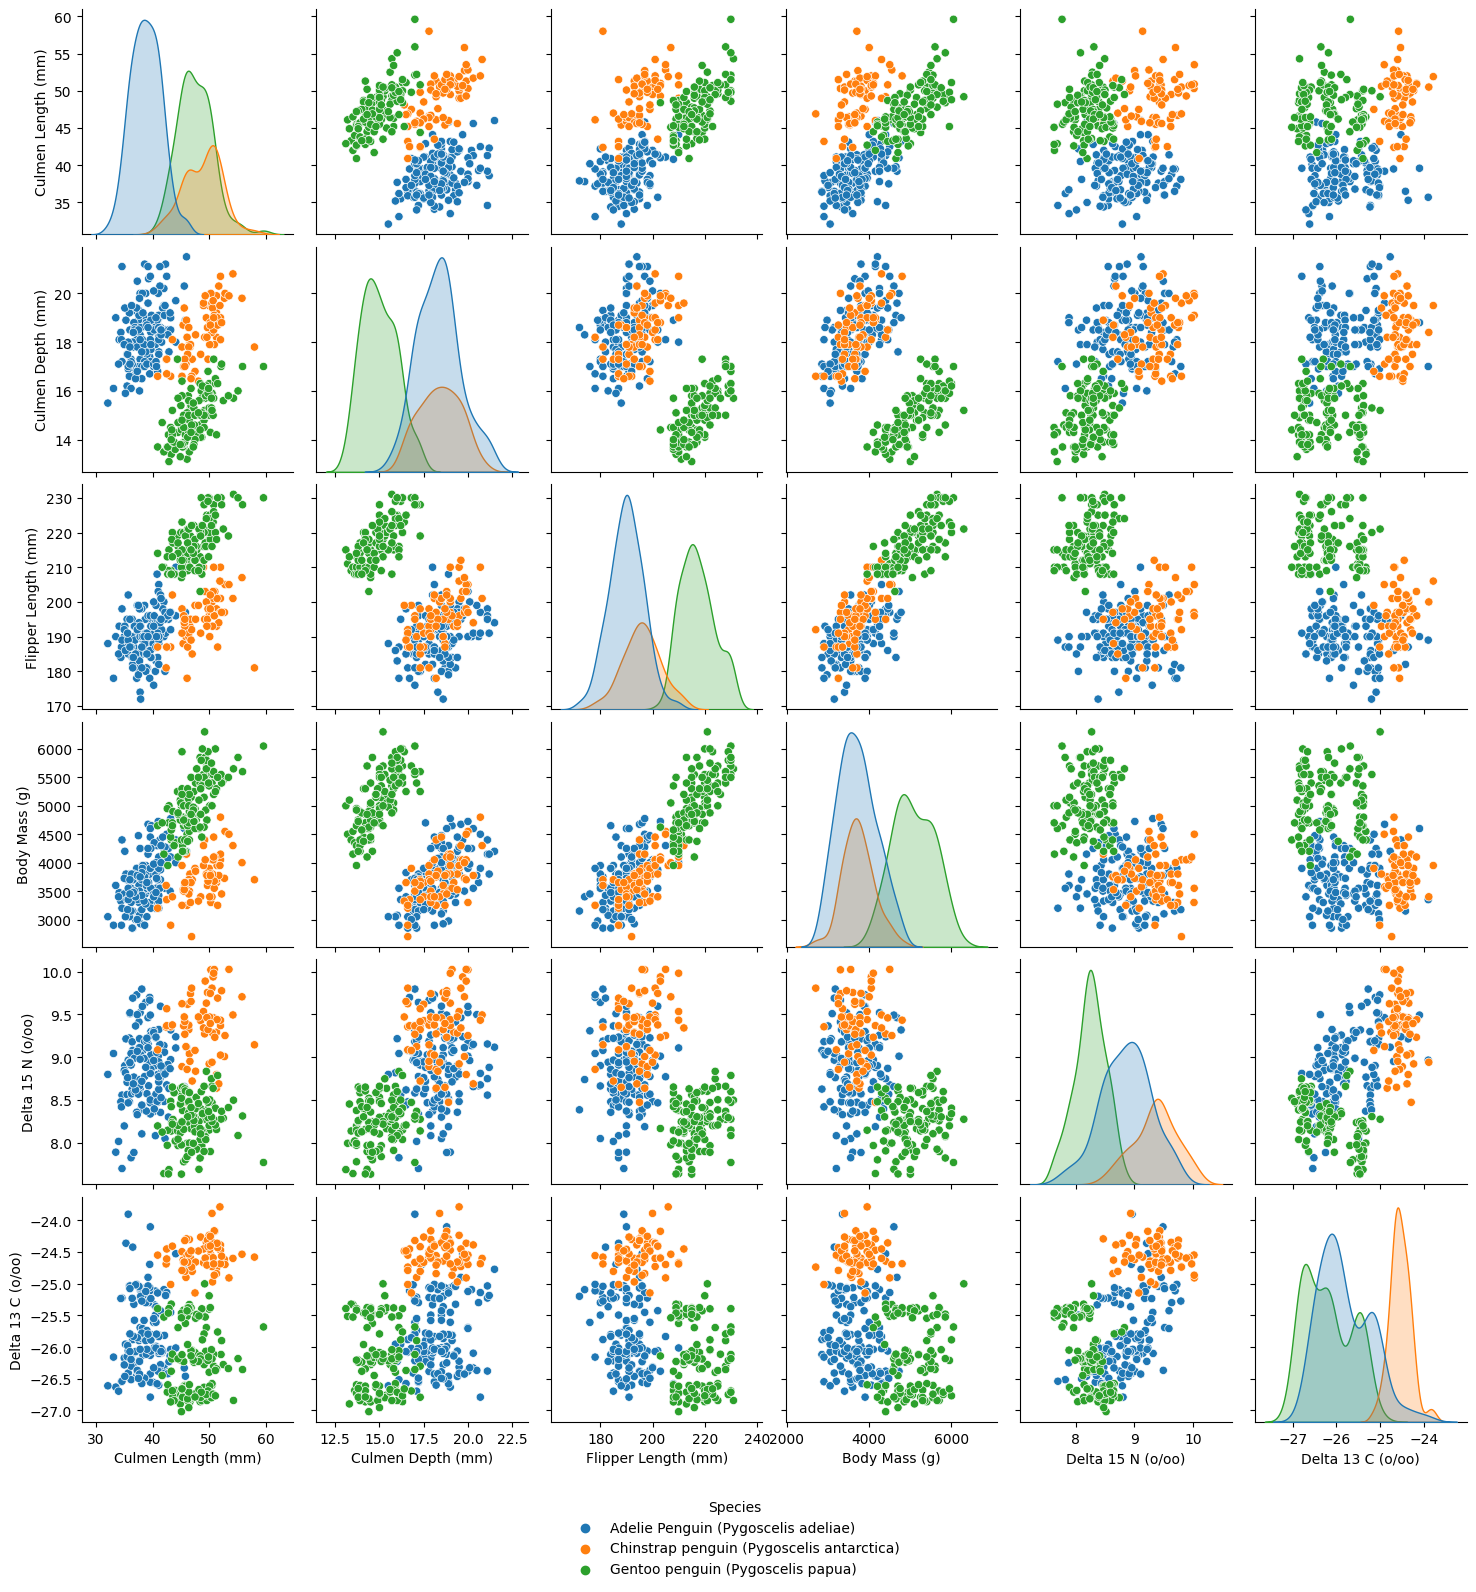

In [101]:
g = sns.pairplot(df_plots3, hue="Species")
sns.move_legend(g, "upper right",bbox_to_anchor=(0.5, 0),frameon=False)
plt.show()

### Vztah dvojic tělesných atributů na základě pohlaví u druhu Adelie

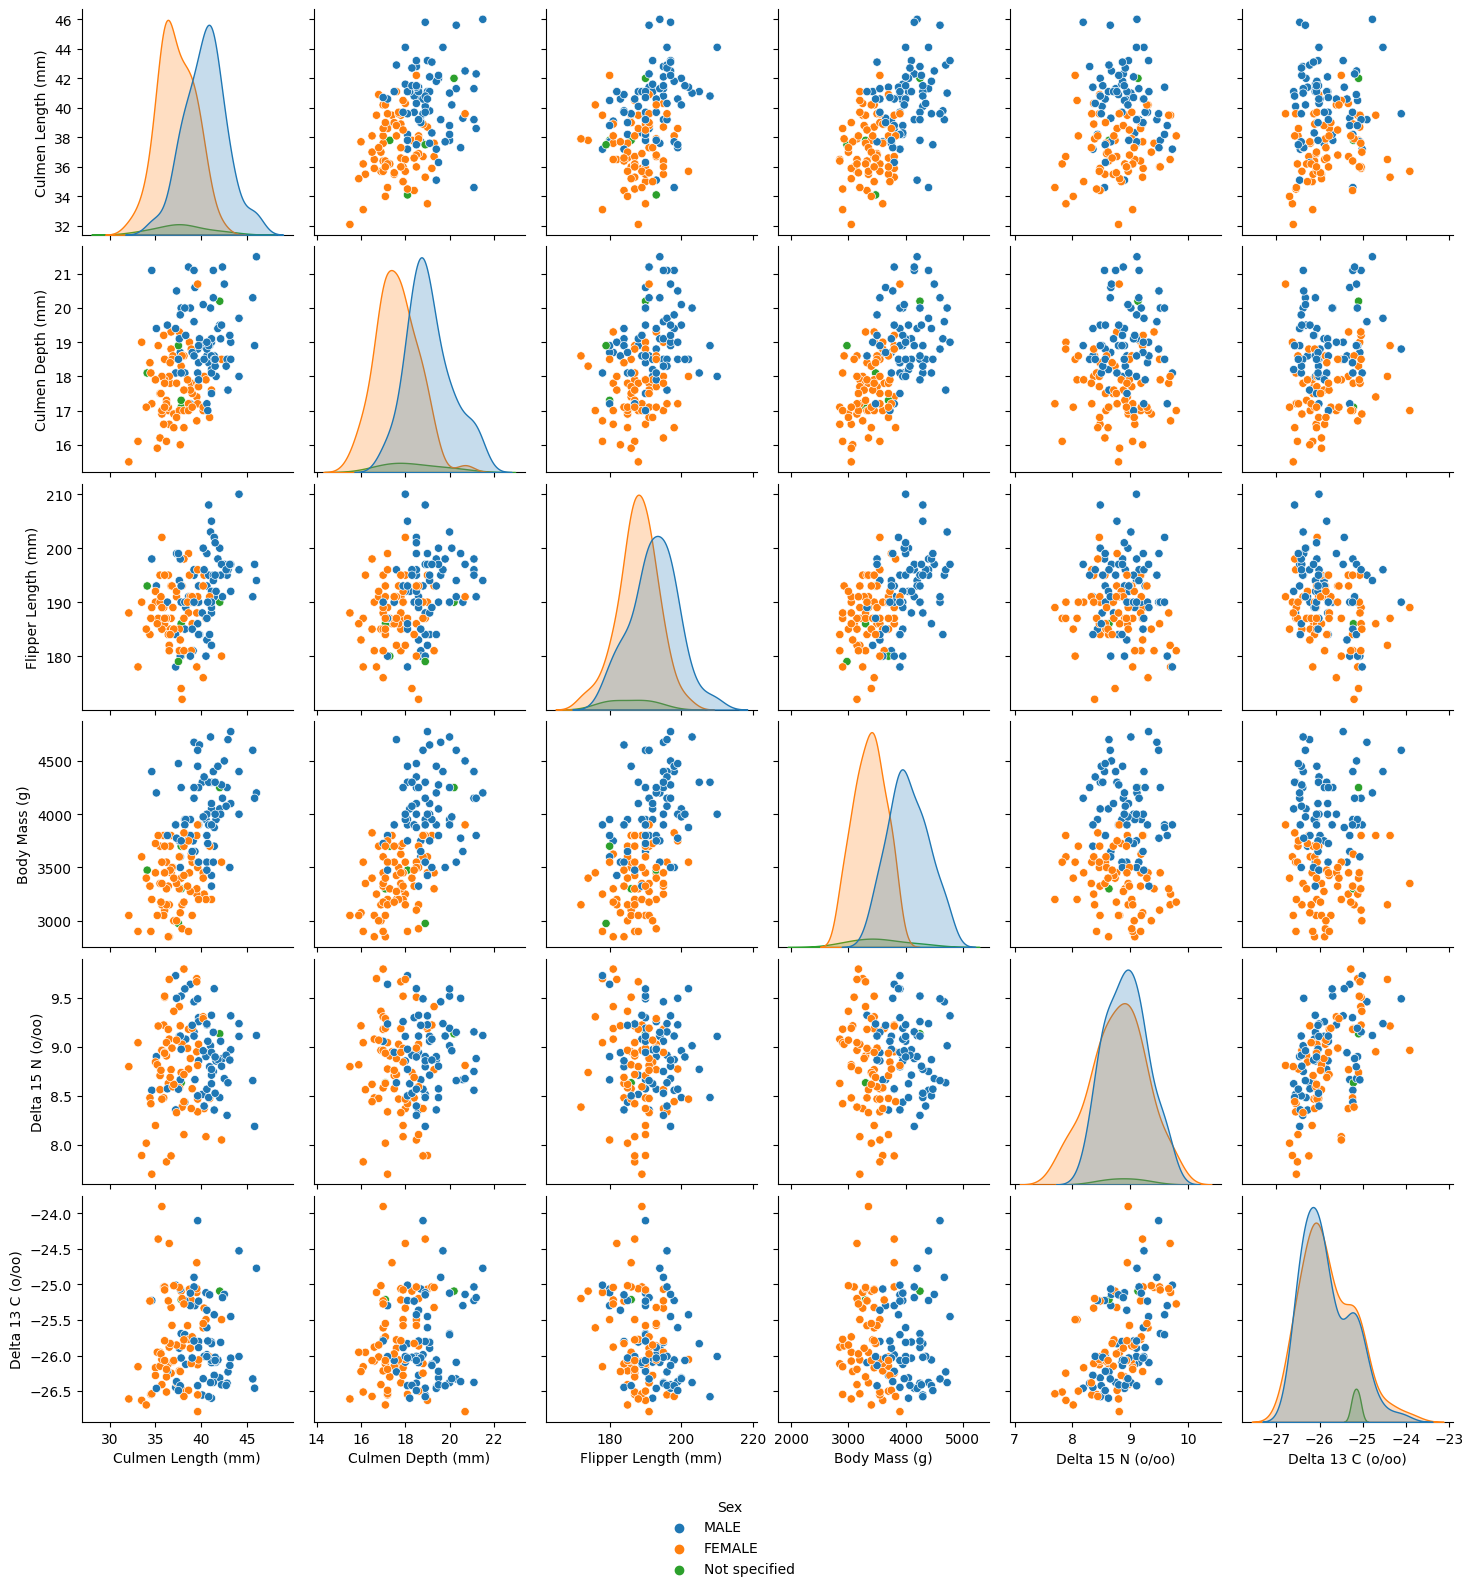

In [102]:
peng_tmp = df_plots3.copy()
peng1 = peng_tmp.loc[peng_tmp['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
g = sns.pairplot(peng1, hue="Sex")
sns.move_legend(g, "upper right",bbox_to_anchor=(0.5, 0),frameon=False)
plt.show()

### Vztah dvojic tělesných atributů na základě pohlaví u druhu Chinstrap

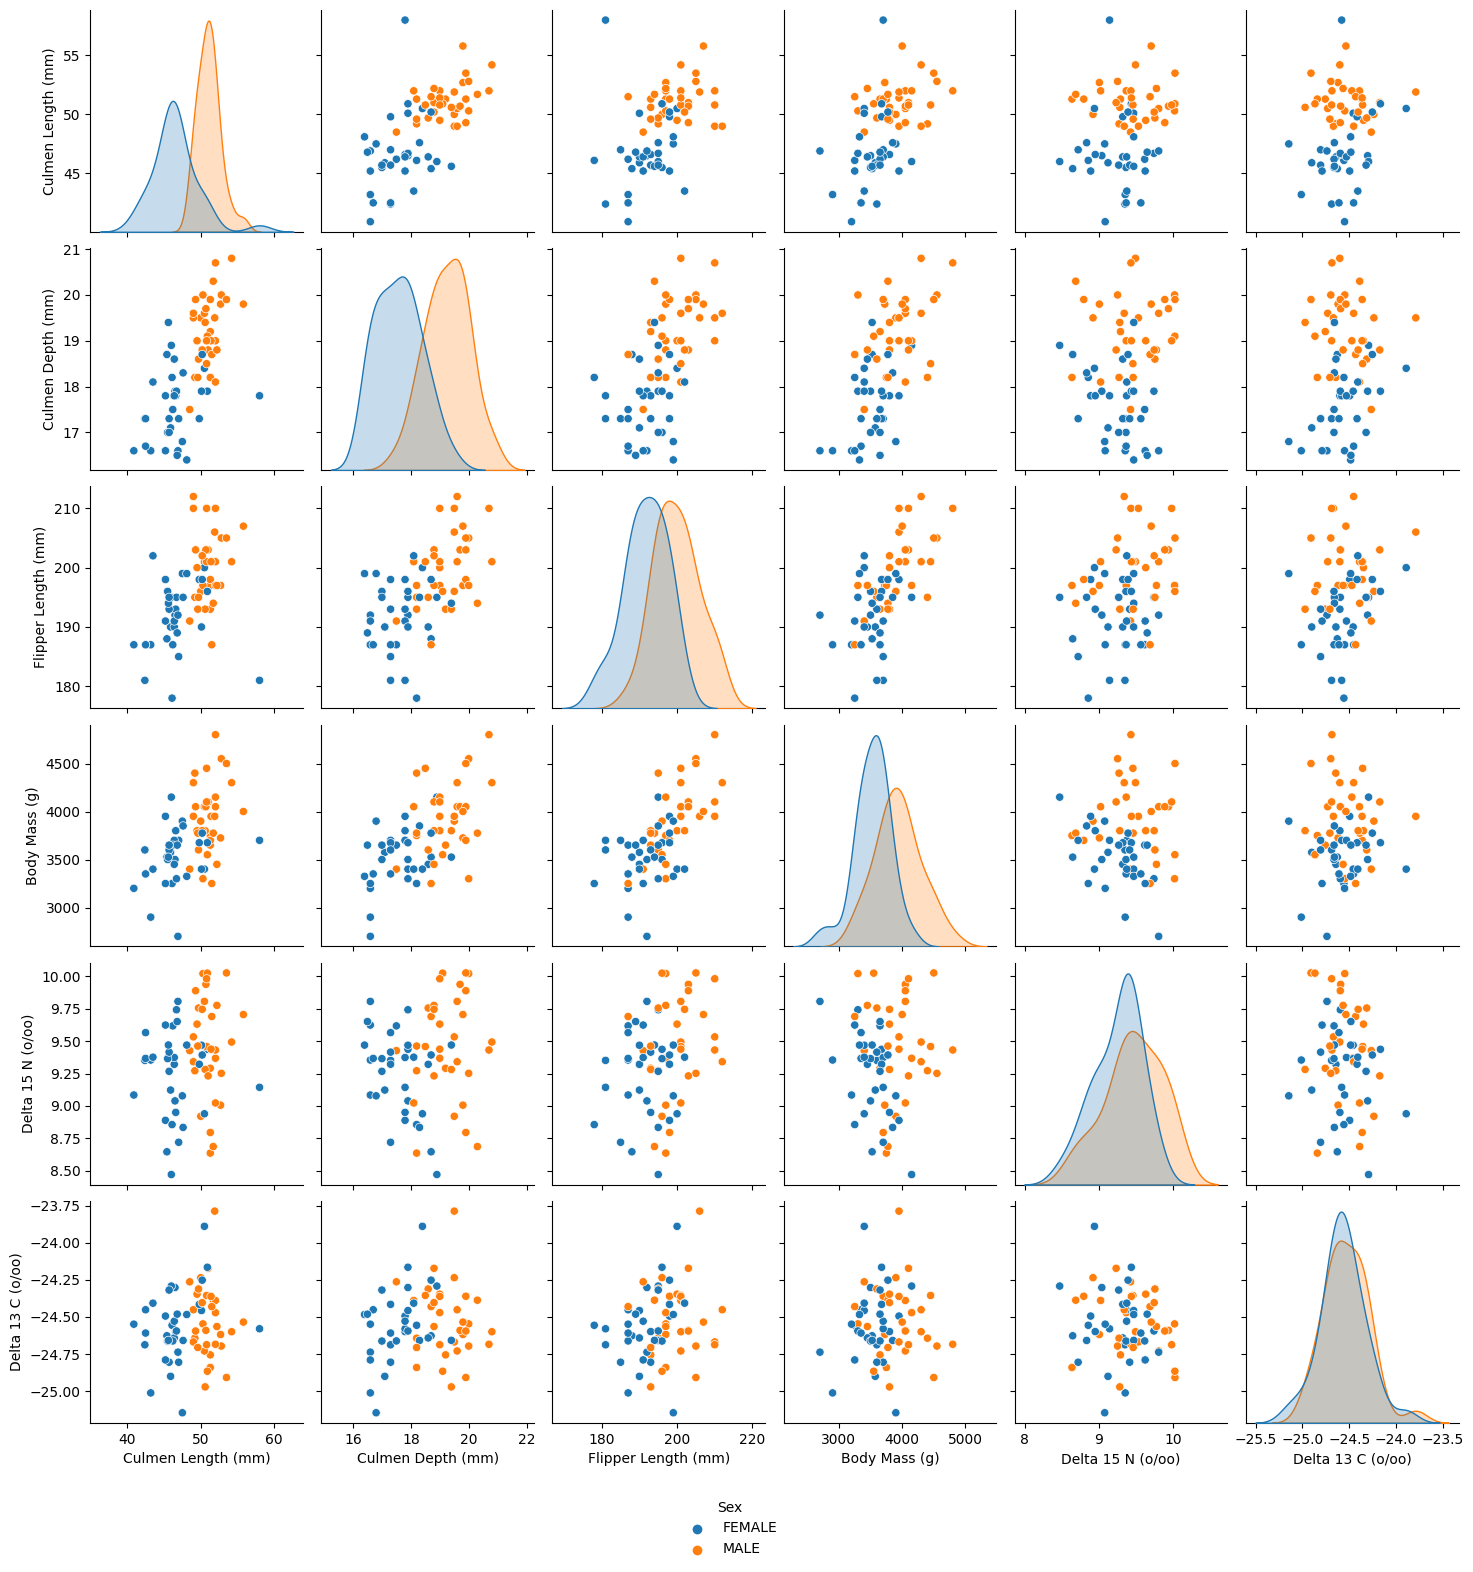

In [103]:
peng2 = peng_tmp.loc[peng_tmp['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
g = sns.pairplot(peng2, hue="Sex")
sns.move_legend(g, "upper right",bbox_to_anchor=(0.5, 0),frameon=False)
plt.show()

### Vztah dvojic tělesných atributů na základě pohlaví u druhu Gentoo

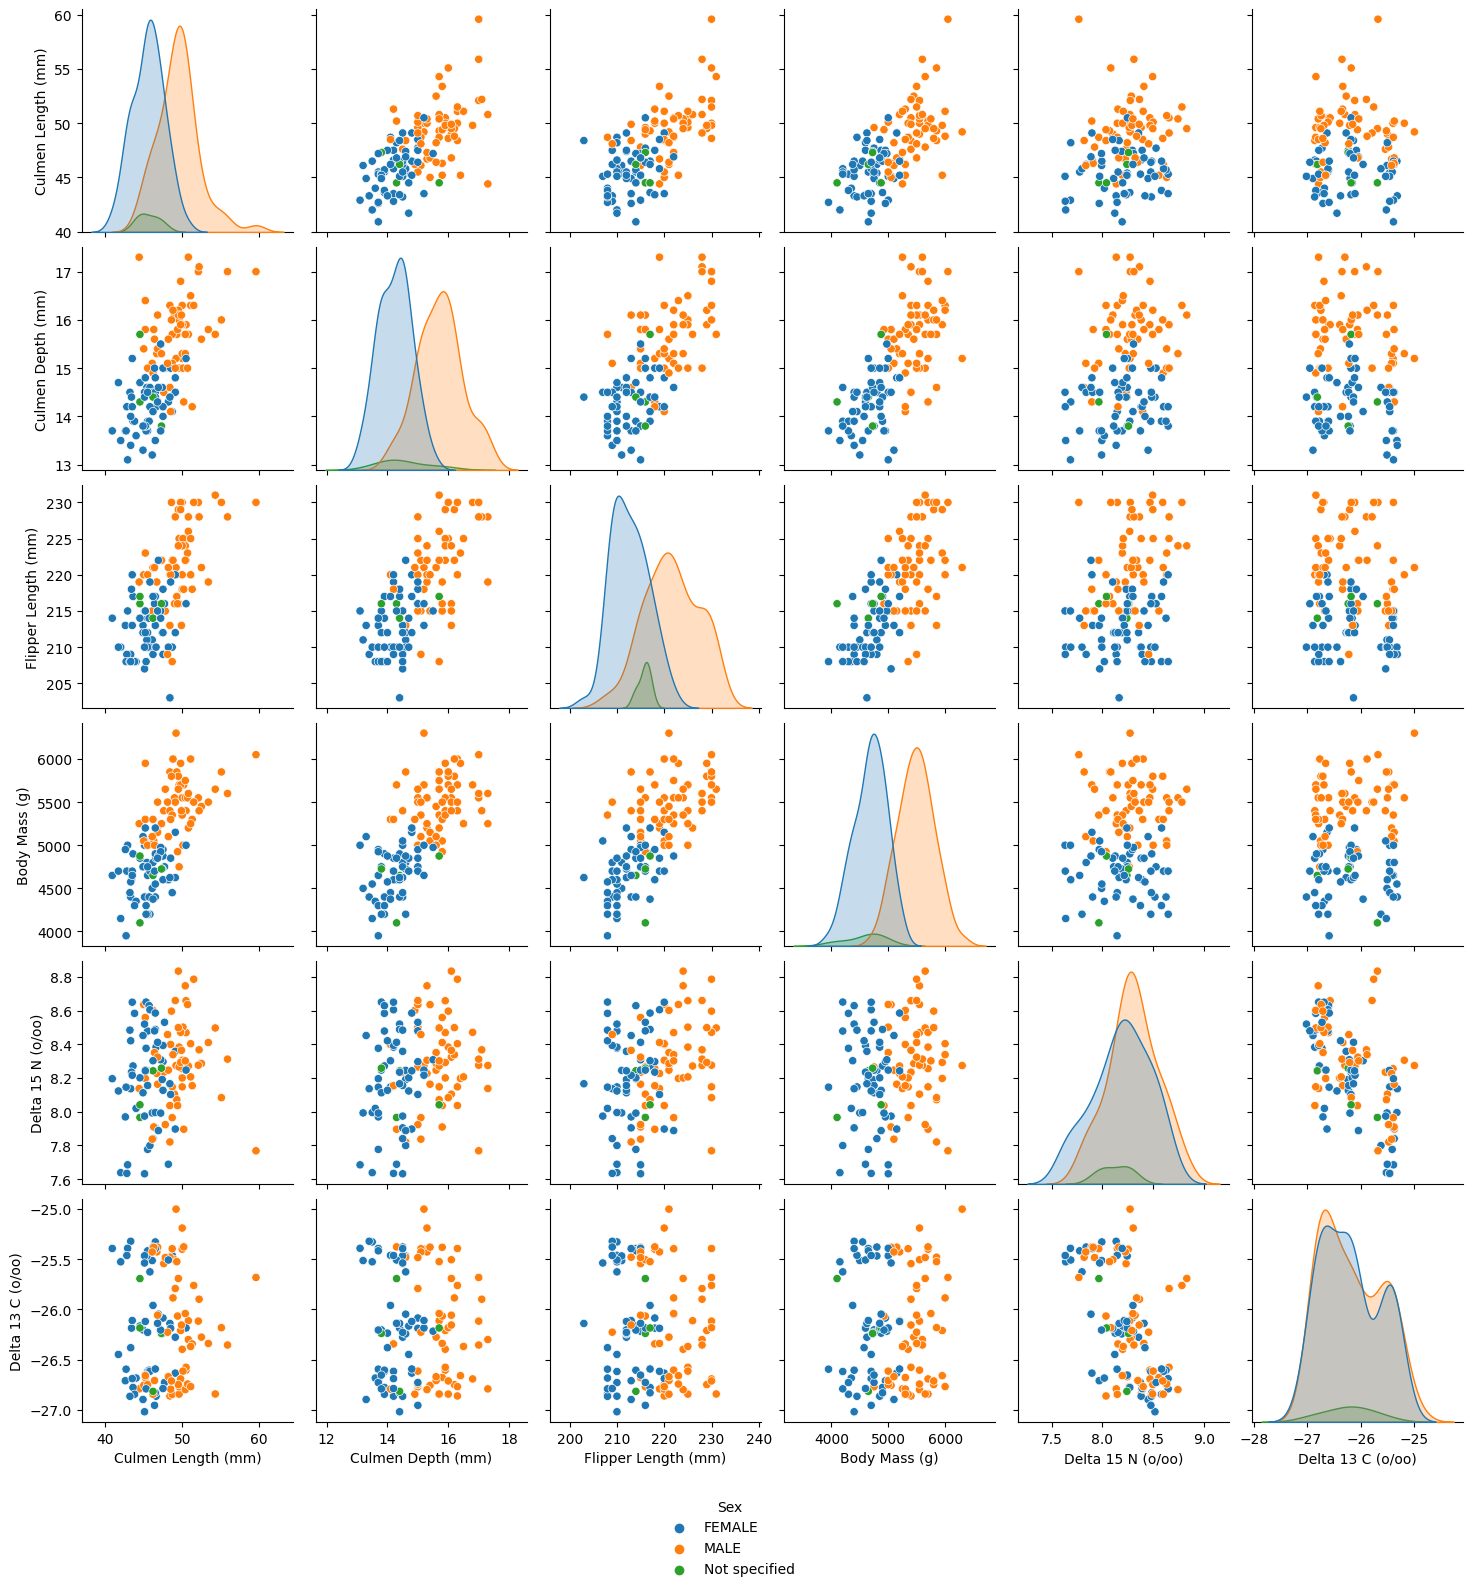

In [104]:
peng3 = peng_tmp.loc[peng_tmp['Species'] == 'Gentoo penguin (Pygoscelis papua)']
g = sns.pairplot(peng3, hue="Sex")
sns.move_legend(g, "upper right",bbox_to_anchor=(0.5, 0),frameon=False)
plt.show()

## Průzkum odlehlých hodnot

*Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.*

V první fázi se podíváme na krabicové grafy pro zvolené atributy. Z grafů vidíme, že žádné odlehlé hodnoty nebyly nalezeny.
Je však vhodné si tuto skutečnost ověřit i numericky. Proto dále vypočítáme z-score, které pro každý vzorek určí, jak daleko od střední hodnoty se nachází. Hodnota je udáná ve směrodatných odchylkách. Za odlehlé hodnoty budeme považovat data, která jsou alespoň 3 $\sigma$ od $\mu$. Jelikož takové hodnoty neexistují, je v kodu ukázka s hodnotou prahu 1 $\sigma$.

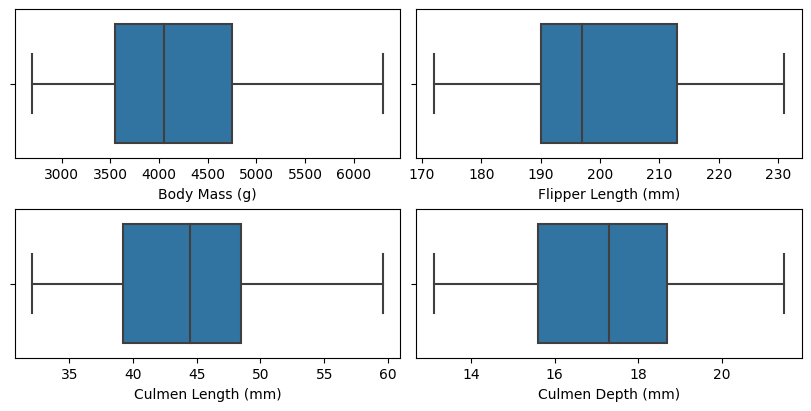

In [105]:
fig, ax = plt.subplots(2,2,figsize=(8, 4),constrained_layout = True)

sns.boxplot(x=df["Body Mass (g)"], ax=ax[0,0])
sns.boxplot(x=df["Flipper Length (mm)"], ax=ax[0,1])
sns.boxplot(x=df["Culmen Length (mm)"], ax=ax[1,0])
sns.boxplot(x=df["Culmen Depth (mm)"], ax=ax[1,1])
plt.show()


In [106]:
tmpdf = df.loc[:,['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']]
zscores_df = stats.zscore(tmpdf, nan_policy='omit')

# Tabulka z-scores
print(zscores_df[(np.abs(zscores_df) > 1).all(axis=1)])

# Tabulka opravdovych hodnot
print(tmpdf[(np.abs(zscores_df) > 1).all(axis=1)])

     Body Mass (g)  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)
38       -1.126093           -1.159648           1.089724            -1.418347
240       1.870980            1.151602          -1.445897             1.216767
289       1.683663            1.243318          -1.090910             1.572863
307       1.371468            1.353378          -1.496609             1.216767
     Body Mass (g)  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)
38          3300.0                37.6               19.3                181.0
240         5700.0                50.2               14.3                218.0
289         5550.0                50.7               15.0                223.0
307         5300.0                51.3               14.2                218.0


## Analýza chybějících hodnot

*Proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).*

Kód níže nám spočítal celkový počet chybějících hodnot pro atributy, u kterých chyběla alespoň jedna hodnota. Největší nedostatek hodnot
je u atributu "Comments". Následně jsme spočítali celkový počet chybějících hodnot pro všechny atributy, ten je roven 363.

In [107]:
df_missing = df.loc[:, df.isna().any()]
missing_sum = df_missing.isna().sum()
print("Count of missing values by attributes:", missing_sum, sep='\n')
print("All missing values: ", missing_sum.sum())


Count of missing values by attributes:
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64
All missing values:  363


Zásadním problémem se jeví být dva záznamy u kterých chybí popis tělesných vlastností tučňáka. Proto je potřeba záznamy najít. Vzhledem k množství chybějících informací a nízkému počtu záznamů se vyplatí tyto záznamy z analýz odstranit. Doplnit vše medianem/modusem/střendí hodnotou nemá smysl.

In [108]:
df_missing[df_missing["Body Mass (g)"].isna()]

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
3                   NaN                NaN                  NaN   
339                 NaN                NaN                  NaN   

     Body Mass (g)  Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
3              NaN  NaN                NaN                NaN   
339            NaN  NaN                NaN                NaN   

               Comments  
3    Adult not sampled.  
339                 NaN

## Korelační analýza numerických atributů

*Proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).*

Z datasetu jsme získaly data pouze numerických atributů. K zobrazení korelací, tedy zjištění zda-li mezi atributy existují závislosti jsme
použili teplotní mapu ("heatmap"). Čím větší je korelace tím výraznější je zbarvení čtverce. Z grafu je patrné, že zde existuje spousta středně silných zavislostí a dokonce i jedna silná přesahující hodnotu 0.7.

Silná závislost je mezi atributy "Body Mass (g)" a "Flipper Length (mm)", jejichž korelační koeficient je 0.87.
Mezi další středně silné závislosti patří například "Flipper Length (mm)" a "Culmen Length (mm)" s korelačním koeficientem 0.66 a atributy "Delta 15 N (o/oo)" and "Culmen Depth (mm) s korelačním koeficientem 0.61. 

Výpočty korelací jsou uvedeny pod grafem.

<AxesSubplot: >

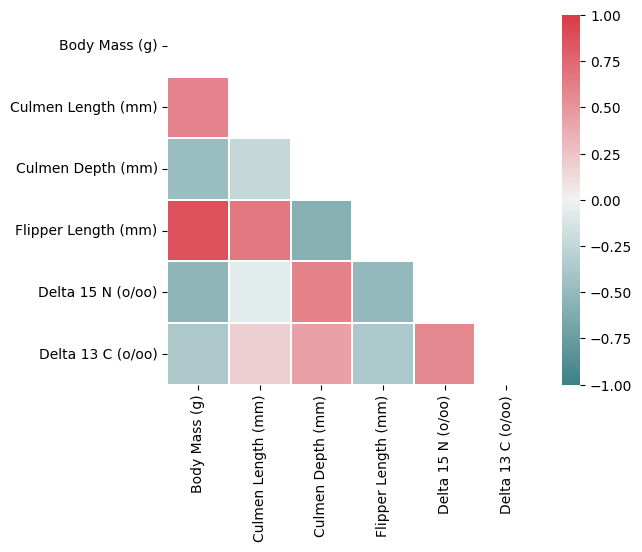

In [109]:
corr = df.loc[:,['Body Mass (g)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0, square=True, linewidths=0.1)

In [110]:
print("Correlation between \"Flipper Length (mm)\" and \"Body Mass (g)\": ", df['Body Mass (g)'].corr(df['Flipper Length (mm)']).round(2))
print("Correlation: between \"Flipper Length (mm)\" and \"Culmen Length (mm)\": ", df['Culmen Length (mm)'].corr(df['Flipper Length (mm)']).round(2))
print("Correlation: between \"Flipper Length (mm)\" and \"Culmen Depth (mm)\": ", df['Culmen Depth (mm)'].corr(df['Flipper Length (mm)']).round(2))
print("Correlation: between \"Delta 15 N (o/oo)\" and \"Culmen Depth (mm)\": ", df['Culmen Depth (mm)'].corr(df['Delta 15 N (o/oo)']).round(2))
print("Correlation: between \"Delta 15 N (o/oo)\" and \"Culmen Depth (mm)\": ", df['Body Mass (g)'].corr(df['Delta 15 N (o/oo)']).round(2))


Correlation between "Flipper Length (mm)" and "Body Mass (g)":  0.87
Correlation: between "Flipper Length (mm)" and "Culmen Length (mm)":  0.66
Correlation: between "Flipper Length (mm)" and "Culmen Depth (mm)":  -0.58
Correlation: between "Delta 15 N (o/oo)" and "Culmen Depth (mm)":  0.61
Correlation: between "Delta 15 N (o/oo)" and "Culmen Depth (mm)":  -0.54


### Korelace mezi numerickými atributy jednotlivých druhů tučňáků

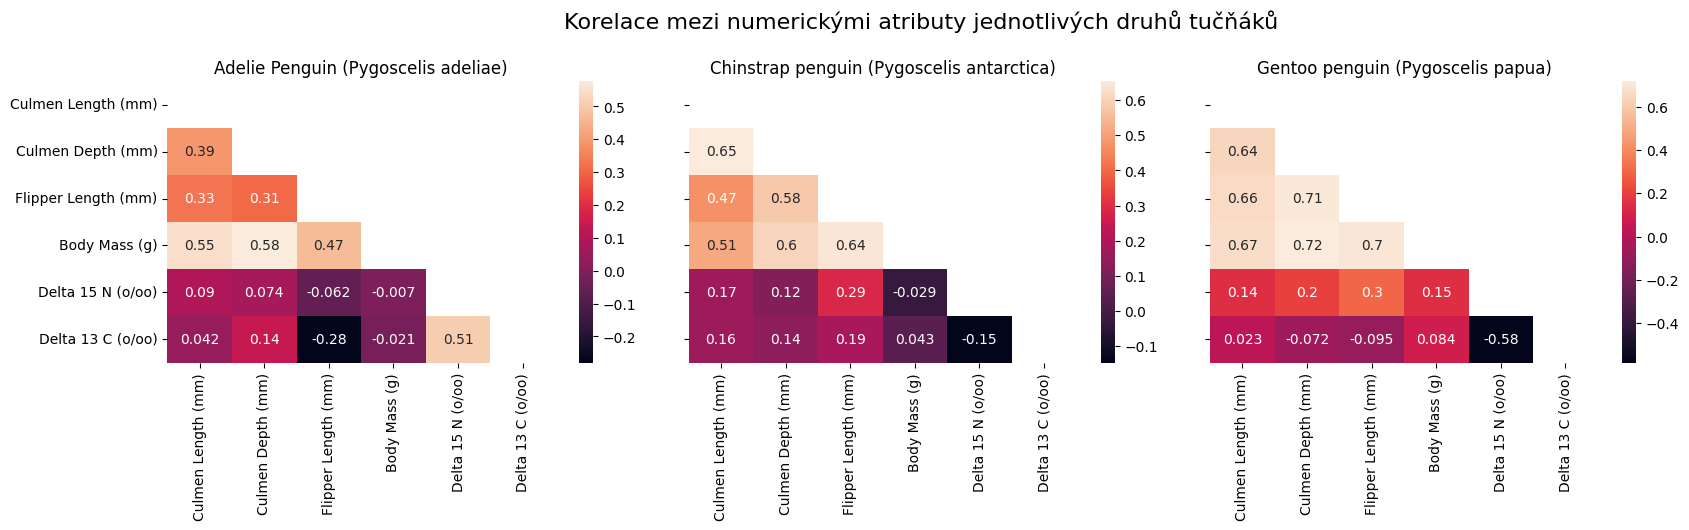

In [111]:
# numerické atributy
numeric_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

peng1_corr = peng1[numeric_columns].copy()
peng2_corr = peng2[numeric_columns].copy()
peng3_corr = peng3[numeric_columns].copy()

# párová korelace numerických sloupců
corr_matrix1 = peng1_corr.corr()
corr_matrix2 = peng2_corr.corr()
corr_matrix3 = peng3_corr.corr()

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True, sharex=True)
fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.suptitle('Korelace mezi numerickými atributy jednotlivých druhů tučňáků', fontsize=16)


mask1 = np.triu(np.ones_like(corr_matrix1, dtype=bool))
sns.heatmap(ax=axes[0], mask=mask1, data=corr_matrix1, annot=True)
axes[0].set_title('Adelie Penguin (Pygoscelis adeliae)')

mask2 = np.triu(np.ones_like(corr_matrix2, dtype=bool))
sns.heatmap(ax=axes[1], mask=mask2, data=corr_matrix2, annot=True)
axes[1].set_title("Chinstrap penguin (Pygoscelis antarctica)")

mask3 = np.triu(np.ones_like(corr_matrix3, dtype=bool))
sns.heatmap(ax=axes[2], mask=mask3, data=corr_matrix3, annot=True)
axes[2].set_title("Gentoo penguin (Pygoscelis papua)")

plt.show()